<a href="https://colab.research.google.com/github/Abdoul1996/Statistic-learning/blob/main/Mid_Term_PartII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf


In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Calling the path of the data
path = "/content/drive/MyDrive/Math-448/ALL CSV FILES - 2nd Edition/Boston.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
# Optional: Drop the unnamed index column if needed
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
df.shape

(506, 13)

In [9]:
# Fit the model with interaction term
model = smf.ols('medv ~ lstat + rm + lstat:rm', data=df).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.75e-146
Time:                        17:55:14   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.1245      3.342     -8.713      0.000     -35.692     -22.558
lstat          2.1940      0.206     10.666      0.000       1.790       2.598
rm             9.7013      0.500     19.393      0.000       8.718      10.684
lstat:rm      -0.4849      0.035    -14.018      0.000      -0.553      -0.417
==============================================================================
Omnibus:                      223.968   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.462
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.fittedvalues

,0
0,29.708518
1,24.759897
2,35.378946
3,35.237891
4,33.431079
...,...
501,25.134421
502,23.220397
503,31.845571
504,29.653117


In [12]:

# Get predicted values from the model
df['predicted_medv'] = model.fittedvalues
df['actual_medv'] = df['medv']

In [14]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,predicted_medv,actual_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,29.708518,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,24.759897,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,35.378946,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,35.237891,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,33.431079,36.2


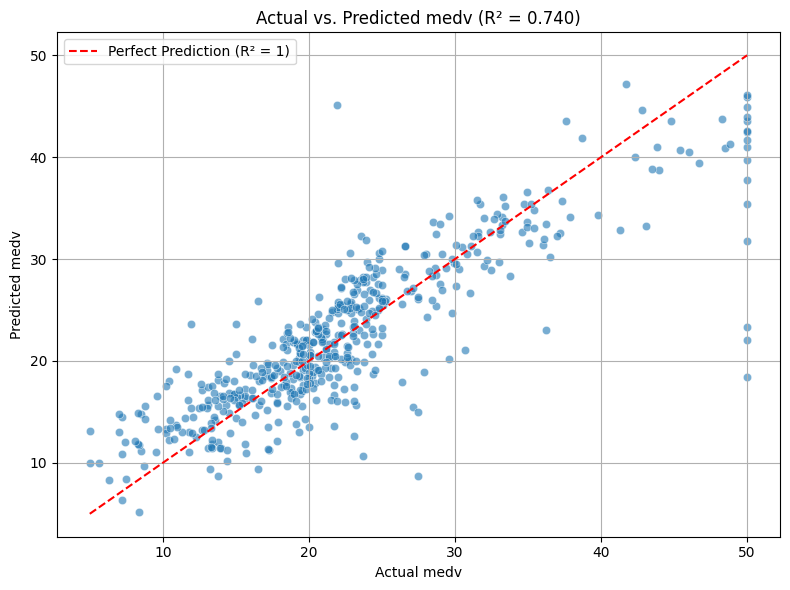

In [15]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_medv', y='predicted_medv', data=df, alpha=0.6)
plt.plot([df['actual_medv'].min(), df['actual_medv'].max()],
         [df['actual_medv'].min(), df['actual_medv'].max()],
         color='red', linestyle='--', label='Perfect Prediction (R² = 1)')

plt.title(f'Actual vs. Predicted medv (R² = {model.rsquared:.3f})')
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
model.resid.describe()

,0
count,5.060000e+02
mean,9.840876e-14
std,4.687402e+00
min,-2.323489e+01
25%,-2.689655e+00
50%,-6.157909e-01
75%,1.966326e+00
max,3.161405e+01


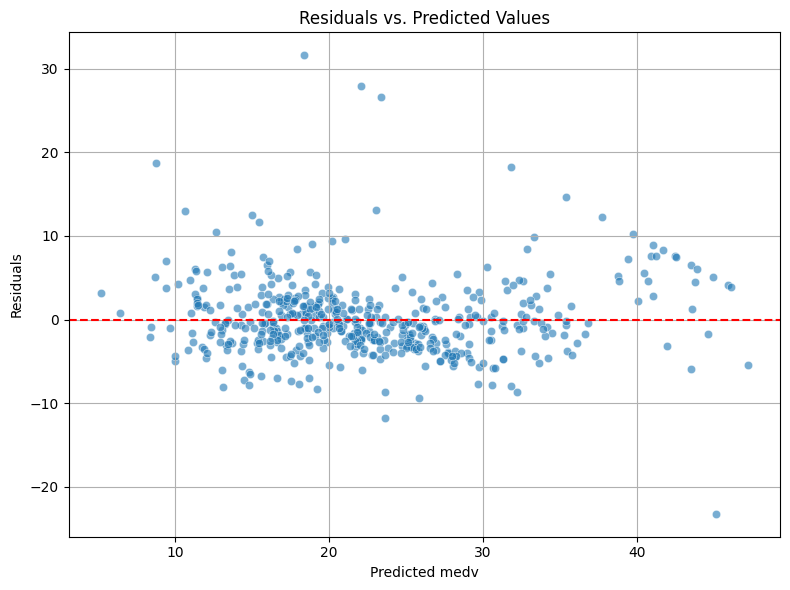

In [19]:
# Calculate residuals
df['residuals'] = model.resid

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['predicted_medv'], y=df['residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted medv')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,predicted_medv,actual_medv,residuals
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,29.708518,24.0,-5.708518
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,24.759897,21.6,-3.159897
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,35.378946,34.7,-0.678946
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,35.237891,33.4,-1.837891
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,33.431079,36.2,2.768921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,25.134421,22.4,-2.734421
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,23.220397,20.6,-2.620397
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,31.845571,23.9,-7.945571
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,29.653117,22.0,-7.653117


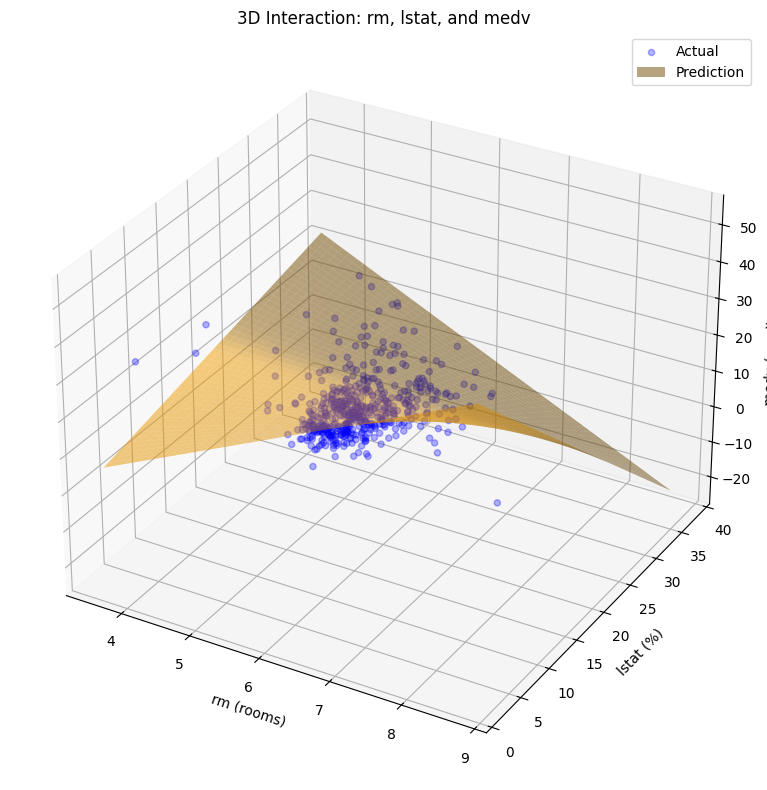

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter original data
ax.scatter(df['rm'], df['lstat'], df['medv'], color='blue', alpha=0.3, label='Actual')

# Mesh grid for predicted surface
rm_range = np.linspace(df['rm'].min(), df['rm'].max(), 50)
lstat_range = np.linspace(df['lstat'].min(), df['lstat'].max(), 50)
rm_grid, lstat_grid = np.meshgrid(rm_range, lstat_range)

# Predict on the mesh grid
grid_df = pd.DataFrame({
    'rm': rm_grid.ravel(),
    'lstat': lstat_grid.ravel()
})
grid_df['lstat:rm'] = grid_df['rm'] * grid_df['lstat']
predicted_grid = model.predict(grid_df).values.reshape(rm_grid.shape)

# Plot predicted surface
ax.plot_surface(rm_grid, lstat_grid, predicted_grid, color='orange', alpha=0.5, label='Prediction')

# Labels
ax.set_xlabel('rm (rooms)')
ax.set_ylabel('lstat (%)')
ax.set_zlabel('medv (predicted)')
ax.set_title('3D Interaction: rm, lstat, and medv')

plt.legend()
plt.tight_layout()
plt.show()

In [23]:
df.shape

(506, 16)